In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report



In [3]:
df = pd.read_csv('Iris.csv')
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [6]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50

3 three >> multiclass classification 


In [5]:
from sklearn.datasets import load_iris


In [7]:
iris = load_iris()


In [8]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [10]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [13]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [15]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [16]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
species = {0:'setosa',1:'versicolor',2:'virginica'}

In [12]:
iris_df = pd.DataFrame(iris.data)
iris_df

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [17]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['Target'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [18]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [20]:
le = LabelEncoder()
le.fit_transform(df['Species'])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [21]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [23]:
species_list = df['Species'].unique().tolist()
species_list.sort()
species_list

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [24]:
l1 = ["XS","S","M","L","XL","XXL"]
l1

['XS', 'S', 'M', 'L', 'XL', 'XXL']

In [ ]:
l1_label_encoding  = [0,1,2,3,4,5]


In [25]:
le_v1 = LabelEncoder()
le_v1.fit_transform(l1)

array([4, 2, 1, 0, 3, 5], dtype=int64)

In [26]:
l1.sort()

In [27]:
l1

['L', 'M', 'S', 'XL', 'XS', 'XXL']

In [ ]:
"XS","S","M","L","XL","XXL"]
[4,   2,   1, 0,   3,   5]


['L', 'M', 'S', 'XL', 'XS', 'XXL']
[0,    1,   2,   3,    4,     5]


["XS","S","M","L","XL","XXL"]
[0,   1,   2,  3,   4,   5]

In [ ]:
Feature >> Categorical Features 
                Nominal >> One Hot Encoding  pd.get_dummies() 
                Ordinal >> Label Encoding    replace, labelEncoder

In [28]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [29]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [34]:
iris_df['Target'].value_counts()

0    50
1    50
2    50
Name: Target, dtype: int64

In [35]:
iris_df['Target'].value_counts()/ len(df)*100

0    33.333333
1    33.333333
2    33.333333
Name: Target, dtype: float64

<AxesSubplot: xlabel='Target', ylabel='count'>

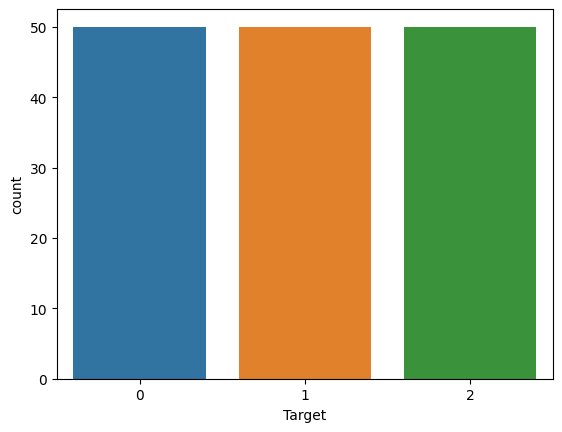

In [38]:
sns.countplot(x = iris_df['Target'])

In [30]:
# Model Training 

In [31]:
x = iris_df.drop('Target', axis = 1) 
y = iris_df['Target']

x_train, x_test, y_train,y_test = train_test_split(x,y, test_size=0.25, random_state=19, stratify=y)

In [32]:
x_train.shape, x_test.shape, y_train.shape,y_test.shape

((112, 4), (38, 4), (112,), (38,))

In [40]:
model = LogisticRegression(max_iter= 150)
model.fit(x_train,y_train)

LogisticRegression(max_iter=150)

# Model Evaluation 

In [42]:
# Testing Data 

y_pred = model.predict(x_test)
y_pred

array([0, 1, 1, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 1, 0, 0, 0, 1, 0, 1, 2, 1,
       2, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 2, 2, 1, 1, 2])

In [43]:
y_test

31     0
91     1
76     1
115    2
40     0
19     0
116    2
46     0
2      0
135    2
139    2
101    2
5      0
92     1
34     0
33     0
10     0
90     1
49     0
73     1
129    2
53     1
149    2
43     0
61     1
22     0
85     1
81     1
71     1
82     1
15     0
138    2
60     1
128    2
142    2
50     1
106    2
109    2
Name: Target, dtype: int32

In [44]:
accuracy_score(y_test,y_pred)

0.9473684210526315

In [45]:
confusion_matrix(y_test,y_pred)

array([[13,  0,  0],
       [ 0, 13,  0],
       [ 0,  2, 10]], dtype=int64)

In [46]:
y_test.shape

(38,)

In [48]:
y_test.value_counts()

0    13
1    13
2    12
Name: Target, dtype: int64

In [49]:
from sklearn.metrics import multilabel_confusion_matrix

In [50]:
multilabel_confusion_matrix(y_test,y_pred)

array([[[25,  0],
        [ 0, 13]],

       [[23,  2],
        [ 0, 13]],

       [[26,  0],
        [ 2, 10]]], dtype=int64)

In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.87      1.00      0.93        13
           2       1.00      0.83      0.91        12

    accuracy                           0.95        38
   macro avg       0.96      0.94      0.95        38
weighted avg       0.95      0.95      0.95        38



In [54]:
# Testing Data 

def model_eval(model, x,y):
    y_pred = model.predict(x)
    
    con_mat = confusion_matrix(y,y_pred)
    print(f"Confusion Matrix: \n {con_mat}")
    
    clf_report = classification_report(y,y_pred)
    print(f"Classification Report = \n{clf_report}")
    
    ml_cn = multilabel_confusion_matrix(y,y_pred)
    print(f"Class wise Confusion matrix = \n {ml_cn}")
    
    return "Performance Evaluation"

In [55]:
model_eval(model, x_test,y_test)

Confusion Matrix: 
 [[13  0  0]
 [ 0 13  0]
 [ 0  2 10]]
Classification Report = 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.87      1.00      0.93        13
           2       1.00      0.83      0.91        12

    accuracy                           0.95        38
   macro avg       0.96      0.94      0.95        38
weighted avg       0.95      0.95      0.95        38

Class wise Confusion matrix = 
 [[[25  0]
  [ 0 13]]

 [[23  2]
  [ 0 13]]

 [[26  0]
  [ 2 10]]]


'Performance Evaluation'

In [56]:
### Training Data Evaluation 

model_eval(model, x_train,y_train)

Confusion Matrix: 
 [[37  0  0]
 [ 0 35  2]
 [ 0  2 36]]
Classification Report = 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.95      0.95      0.95        37
           2       0.95      0.95      0.95        38

    accuracy                           0.96       112
   macro avg       0.96      0.96      0.96       112
weighted avg       0.96      0.96      0.96       112

Class wise Confusion matrix = 
 [[[75  0]
  [ 0 37]]

 [[73  2]
  [ 2 35]]

 [[72  2]
  [ 2 36]]]


'Performance Evaluation'

In [ ]:
## Bias And Variance Trade off 

Bias >> low Bias >> benchmark acc vs Training acc   

Variance >> low Variance >> training and testing 


Low Bias And Low Variance >> Best Model , Generlised model 


In [ ]:
### User Test Function 

In [58]:
model.predict(x_test)

array([0, 1, 1, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 1, 0, 0, 0, 1, 0, 1, 2, 1,
       2, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 2, 2, 1, 1, 2])

In [78]:
x_test.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
31,5.4,3.4,1.5,0.4
91,6.1,3.0,4.6,1.4


In [64]:
model.predict(x_test.head(1))

array([0])

In [66]:
sl = 5.4 
sw = 3.4
pl = 1.5
pw = 0.4

data = [[sl,sw,pl,pw]]
prediction = model.predict(data)
prediction

C:\Users\Shridhar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [73]:
species = {0:'setosa',1:'versicolor',2:'virginica'}

In [82]:
sl = 6.4 
sw = 3.4
pl = 4.5
pw = 1.4

data = [[sl,sw,pl,pw]]
result= model.predict(data)
print(f"Predicted Speices of Iris = {species[result[0]]}")

Predicted Speices of Iris = versicolor


C:\Users\Shridhar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [83]:
import pickle 

with open('logistic_model.pkl','wb') as file: 
    pickle.dump(model,file)

In [84]:
import json 

with open('species.json','w') as file: 
    json.dump(species, file)

In [ ]:
## API 

In [ ]:
## DEPLOYMENT 

In [85]:
model = LogisticRegression()